In [1]:
if 'google.colab' in str(get_ipython()):
    !git clone https://github.com/lukewood/rl-routing && cd rl-routing && pip install .

In [15]:
import networkx as nx

graph=nx.random_internet_as_graph(20)
pos = nx.spring_layout(graph)
nx.set_node_attributes(graph, pos, "pos")

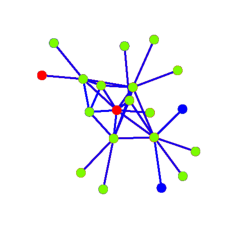

Reward 17
Total 461


In [ ]:
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
import time
import rl_routing
from IPython.display import clear_output

def draw_output(img):
    plt.axis("off")
    plt.imshow(img)
    plt.show()

env = rl_routing.NetworkEnv(graph=graph, fig=Figure(figsize=(6, 6)))
i = 100
env.create_packets(n=i)

for _ in range(1000):
    observation, reward, done, _ = env.step()
    img = env.render()
    draw_output(img)
    print("Reward", reward)
    print("Total", env.completed_packets)

    clear_output(wait=True)
    time.sleep(100/1000)
    # Add an extra packet each iteration
    if done:
        env.create_packets(n=i)
        i+=1
draw_output(env.render())